In [57]:
import pandas as pd
import numpy as np

In [58]:
bank_df = pd.read_csv('Qualitative_Bankruptcy.data.txt',delimiter =',',names = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

In [59]:
bank_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [60]:
bank_df.shape

(250, 7)

In [61]:
bank_df.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [62]:
bank_df.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

In [63]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [64]:
pd.crosstab(bank_df['Industrial Risk'],bank_df['Class'])

Class,B,NB
Industrial Risk,,
A,28,53
N,53,36
P,26,54


In [65]:
pd.crosstab(bank_df['Management Risk'],bank_df['Class'])

Class,B,NB
Management Risk,,
A,23,46
N,73,46
P,11,51


In [66]:
pd.crosstab(bank_df['Financial Flexibility'],bank_df['Class'])

Class,B,NB
Financial Flexibility,,
A,4,70
N,102,17
P,1,56


In [67]:
pd.crosstab(bank_df['Credibility'],bank_df['Class'])

Class,B,NB
Credibility,,
A,17,60
N,87,7
P,3,76


In [68]:
pd.crosstab(bank_df['Competitiveness'],bank_df['Class'])

Class,B,NB
Competitiveness,,
A,4,52
N,103,0
P,0,91


In [69]:
pd.crosstab(bank_df['Operating Risk'],bank_df['Class'])

Class,B,NB
Operating Risk,,
A,24,33
N,64,50
P,19,60


In [70]:
bank_df1 = bank_df.copy()

In [71]:
bank_df2 = bank_df1.iloc[:,0:-1]
bank_df2 = pd.get_dummies(bank_df2)
bank_df2.head()
bank_df2.shape

(250, 18)

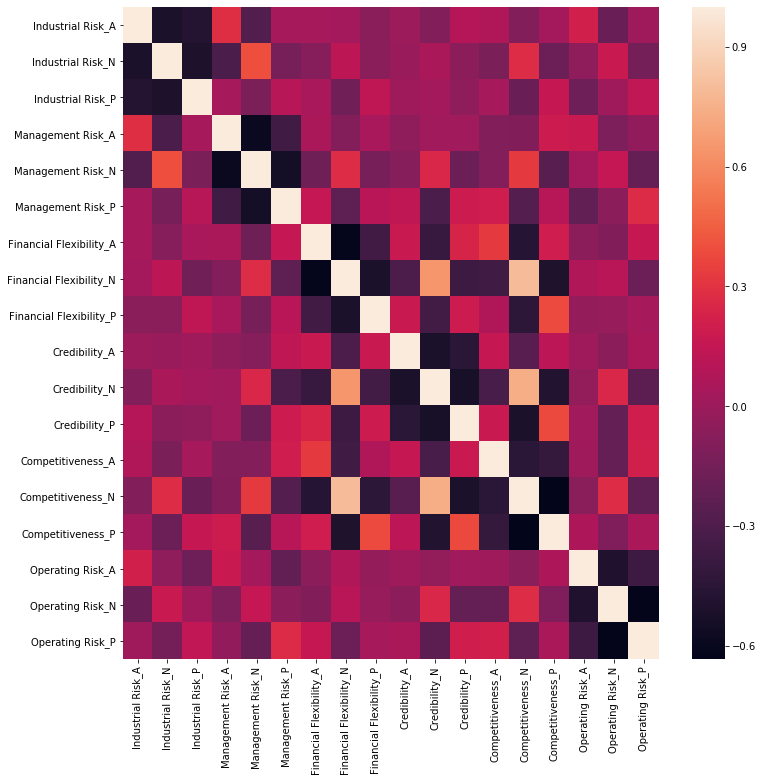

In [72]:
corr = bank_df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,12))
sns.heatmap(corr)

In [73]:
bank_df1.head()
bank_df1['Class'] = bank_df1['Class'].astype('category')

In [74]:
X = bank_df2
y = bank_df1['Class']

In [75]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 8
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.20,random_state = 8)

In [76]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 2.23894472e-01 -1.17839196e-01 -1.06055276e-01  6.15326633e-02
  -6.78140704e-02  6.28140704e-03  1.28894472e-02 -7.78894472e-04
  -1.21105528e-02  6.18090452e-03 -2.23869347e-02  1.62060302e-02
   1.46733668e-02 -2.24371859e-02  7.76381910e-03  4.64824121e-02
  -5.43718593e-02  7.88944724e-03]
 [-1.17839196e-01  2.28643216e-01 -1.10804020e-01 -6.80904523e-02
   9.57286432e-02 -2.76381910e-02 -1.68341709e-02  2.73869347e-02
  -1.05527638e-02 -3.51758794e-03  7.28643216e-03 -3.76884422e-03
  -2.41206030e-02  5.70351759e-02 -3.29145729e-02 -7.53768844e-03
   4.42211055e-02 -3.66834171e-02]
 [-1.06055276e-01 -1.10804020e-01  2.16859296e-01  6.55778894e-03
  -2.79145729e-02  2.13567839e-02  3.94472362e-03 -2.66080402e-02
   2.26633166e-02 -2.66331658e-03  1.51005025e-02 -1.24371859e-02
   9.44723618e-03 -3.45979899e-02  2.51507538e-02 -3.89447236e-02
   1.01507538e-02  2.87939698e-02]
 [ 6.15326633e-02 -6.80904523e-02  6.55778894e-03  1.95753769e-01
  -1.29170854e-

In [77]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-9.24277730e-02 -4.82461214e-01 -2.45963325e-01  1.30859435e-02
   1.10122488e-01  2.13904406e-01 -2.41828235e-01 -1.11293122e-01
  -4.55122065e-01 -1.36332067e-01 -9.89413111e-02 -2.06089943e-02
  -2.75148877e-02  1.04588815e-01  2.77741320e-01  5.00945884e-01
  -1.35912524e-01  1.41225389e-01]
 [ 1.55233216e-01  4.40760941e-01 -3.34132943e-01  4.33454085e-02
  -3.96238173e-02  9.69865342e-03 -1.98864302e-01  1.93365748e-01
   4.84739763e-01 -3.35788621e-02 -5.42388801e-02  1.30889236e-01
  -2.75148877e-02  1.04588815e-01  2.77741320e-01  5.00945884e-01
  -1.35912524e-01  1.41225389e-01]
 [-6.28054432e-02  4.17002724e-02  5.80096268e-01 -5.64313521e-02
  -7.04986711e-02 -2.23603059e-01  4.40692536e-01 -8.20726259e-02
  -2.96176985e-02  1.69910929e-01  1.53180191e-01 -1.10280242e-01
  -2.75148877e-02  1.04588815e-01  2.77741320e-01  5.00945884e-01
  -1.35912524e-01  1.41225389e-01]
 [-6.83890143e-02 -4.03441794e-01  3.88903834e-02 -3.10359805e-01
   1.61676131e-02  

In [78]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.0507279281232451, array([-0.09242777,  0.15523322, -0.06280544, -0.06838901,  0.26352532,
       -0.1951363 , -0.23586306,  0.41375654, -0.17789348, -0.13825893,
        0.38571382, -0.2474549 , -0.15915766,  0.43860838, -0.27945071,
       -0.01424105,  0.19084922, -0.17660817])), (0.4809661459681776, array([-0.48246121,  0.44076094,  0.04170027, -0.40344179,  0.35736034,
        0.04608146,  0.07371575, -0.2014096 ,  0.12769384,  0.11764003,
       -0.18549798,  0.06785795,  0.0374701 , -0.09878741,  0.06131731,
       -0.23594797,  0.29830423, -0.06235626])), (0.3934925251854968, array([-0.24596333, -0.33413294,  0.58009627,  0.03889038, -0.28051006,
        0.24161967, -0.07792167,  0.01461435,  0.06330732, -0.01295708,
        0.17413035, -0.16117327, -0.00864951,  0.06425336, -0.05560385,
       -0.42910554,  0.25001684,  0.1790887 ])), (0.3810153140952763, array([ 0.01308594,  0.04334541, -0.05643135, -0.3103598 ,  0.08657406,
        0.22378575,  0.1592966 ,  0.0879534 , -0

In [79]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)
var_explained

[0.2683490004960607,
 0.12283558958362817,
 0.10049540229201322,
 0.0973088046624827,
 0.08258526158009076,
 0.07476584119430577,
 0.06930390839172856,
 0.056577684780883514,
 0.04824124055931853,
 0.04187156694235021,
 0.025315268591031354,
 0.012350430926106132,
 1.923159201042854e-16,
 7.011718457098572e-17,
 4.5329651361480605e-17,
 -4.015317800704438e-19,
 -3.089233418313097e-17,
 -6.06595117096392e-17]

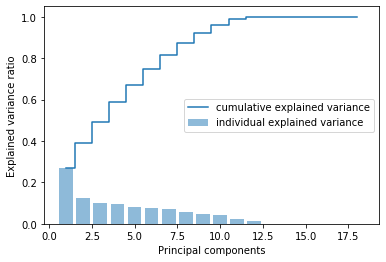

In [80]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [81]:
P_reduce = np.array(eigvectors_sorted[0:11])   

X_std_11D = np.dot(X_train,P_reduce.T)   # projecting original train data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_11D)

In [82]:
Proj_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.198067,0.885856,-0.204164,-0.000352,-0.118071,0.851159,0.319846,0.418984,-0.012751,-0.161736,-0.748500
1,-0.879857,-0.864982,-0.789648,-1.092528,-0.518051,-0.332032,-0.190102,-0.400080,0.017735,-0.216222,-0.002161
2,1.394935,-0.846744,-0.702581,0.164757,-0.018555,-0.345937,0.173090,-0.148295,-0.695199,0.243042,-0.270084
3,-0.828631,-0.869178,-0.782661,-0.738164,0.771805,0.321638,0.490128,0.639262,-0.102027,0.197240,-0.048481
4,-0.799008,-0.345016,0.043399,-0.807681,0.591184,-0.115870,1.172649,0.668483,0.323477,0.503483,0.203640


In [83]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,max_iter=100)
  clusters.fit(Proj_data_df)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_ )    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,769.566668
1,2,582.253006
2,3,529.585469
3,4,478.656099
4,5,441.747848
5,6,408.152958
6,7,390.572063
7,8,369.543407
8,9,357.406906


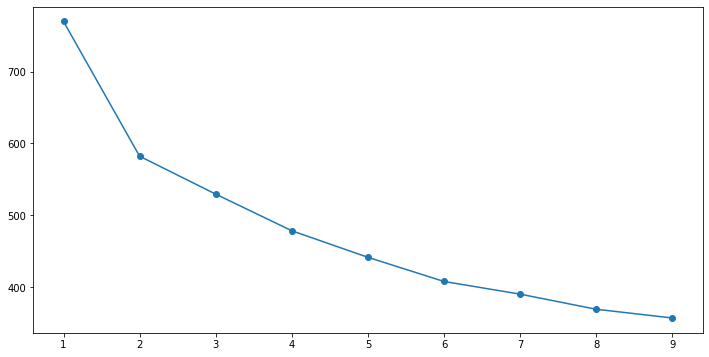

In [84]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ) 
#Ideally the elbow bends at 2 , there must be 2 clusters but let us take 5 clusters.

In [85]:
#Now applying kmeans to the projected data.
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(Proj_data_df)
prediction= kmeans.predict(Proj_data_df)
Proj_data_df['group'] = prediction


In [86]:
Proj_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,group
0,1.198067,0.885856,-0.204164,-0.000352,-0.118071,0.851159,0.319846,0.418984,-0.012751,-0.161736,-0.748500,4
1,-0.879857,-0.864982,-0.789648,-1.092528,-0.518051,-0.332032,-0.190102,-0.400080,0.017735,-0.216222,-0.002161,3
2,1.394935,-0.846744,-0.702581,0.164757,-0.018555,-0.345937,0.173090,-0.148295,-0.695199,0.243042,-0.270084,1
3,-0.828631,-0.869178,-0.782661,-0.738164,0.771805,0.321638,0.490128,0.639262,-0.102027,0.197240,-0.048481,3
4,-0.799008,-0.345016,0.043399,-0.807681,0.591184,-0.115870,1.172649,0.668483,0.323477,0.503483,0.203640,3


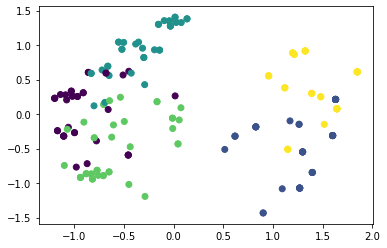

In [87]:
plt.scatter(Proj_data_df[0],Proj_data_df[1], c=Proj_data_df['group'])
#We can see that the clusters are not tight, when we have chosen the number of clusters as 5.
#Now let us reduce the number of clusters to 2 as indicated by the plot and see if we can get better clusters.

In [104]:
#Now applying kmeans to the projected data.
#Reducing the number of clusters to 2
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(Proj_data_df)
prediction= kmeans.predict(Proj_data_df)
Proj_data_df['group'] = prediction


In [105]:
Proj_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,group
0,1.198067,0.885856,-0.204164,-0.000352,-0.118071,0.851159,0.319846,0.418984,-0.012751,-0.161736,-0.748500,0
1,-0.879857,-0.864982,-0.789648,-1.092528,-0.518051,-0.332032,-0.190102,-0.400080,0.017735,-0.216222,-0.002161,1
2,1.394935,-0.846744,-0.702581,0.164757,-0.018555,-0.345937,0.173090,-0.148295,-0.695199,0.243042,-0.270084,0
3,-0.828631,-0.869178,-0.782661,-0.738164,0.771805,0.321638,0.490128,0.639262,-0.102027,0.197240,-0.048481,1
4,-0.799008,-0.345016,0.043399,-0.807681,0.591184,-0.115870,1.172649,0.668483,0.323477,0.503483,0.203640,1
5,-0.967830,0.254251,0.901276,1.164223,0.700909,0.103287,0.380446,0.258223,0.042469,0.331681,0.073418,0
6,-0.828631,-0.869178,-0.782661,-0.738164,0.771805,0.321638,0.490128,0.639262,-0.102027,0.197240,-0.048481,1
7,0.025102,1.329447,-0.471142,-0.044264,-0.452129,0.278289,-0.211692,-1.142369,0.121417,-0.577496,0.151256,1
8,1.268111,-1.073294,0.295942,-0.498889,-0.000368,0.778342,-0.417910,-0.015307,-0.090321,-0.318626,0.065229,0
9,1.323714,0.913869,-0.298716,-0.132519,0.678449,0.159764,-0.325311,0.279786,-0.151895,-0.048928,0.772570,0


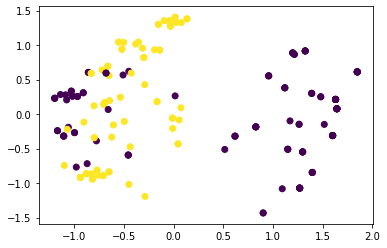

In [106]:
plt.scatter(Proj_data_df[0],Proj_data_df[1], c=Proj_data_df['group'])

In [91]:
P_reduce = np.array(eigvectors_sorted[0:11])   

X_test_proj = np.dot(X_test,P_reduce.T)   # projecting original test data into principal component dimensions

Proj_data_df1 = pd.DataFrame(X_test_proj)

In [107]:
#Now applying kmeans on the test data and forming clusters for the same.
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(Proj_data_df1)
prediction= kmeans.predict(Proj_data_df1)
Proj_data_df1['group'] = prediction


In [108]:
Proj_data_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,group
0,0.032692,0.121509,-0.001550,-0.047968,0.707008,-0.440706,-0.555794,0.480426,1.046418,-1.049614,0.178601,0
1,1.847686,0.610731,-0.111628,-0.071695,-0.182858,0.228745,-0.190344,0.141858,-0.060204,-0.115459,-0.071257,1
2,1.480229,0.250070,-0.182556,0.744993,-0.305785,-0.516784,-0.136124,0.667503,0.064589,-0.551671,-0.115794,1
3,1.141364,-0.623771,0.498671,0.035257,-0.016128,0.583109,-1.015177,-0.051758,-0.569686,0.510225,-0.310359,1
4,-1.139349,0.282295,0.847335,-0.077923,-0.851915,-0.931413,-0.457027,0.103827,-0.216200,0.021405,-0.016040,0


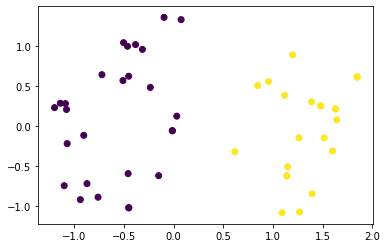

In [109]:
plt.scatter(Proj_data_df1[0],Proj_data_df1[1], c=Proj_data_df1['group'])

In [95]:
#First let us try to implement a classification model on the data frame projected with Pca.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=2)
model.fit(Proj_data_df,y_train)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
model.score(Proj_data_df1,y_test)

0.98

In [97]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_predict = model.predict(Proj_data_df1)
print (metrics.confusion_matrix(y_test,y_predict))

[[23  1]
 [ 0 26]]


In [98]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        24
          NB       0.96      1.00      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [99]:
#Now let us implement the same classification model on the original data frame without the pca.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=2)
model.fit(X_train,y_train)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
model.score(X_test,y_test)

0.98

In [101]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_predict = model.predict(X_test)
print (metrics.confusion_matrix(y_test,y_predict))

[[23  1]
 [ 0 26]]


In [102]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        24
          NB       0.96      1.00      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
## Thus for the given data set the accuracy is 0.98 for both the projected data with pca and also 
##...the original data without pca. Though pca helps in dimensionality reduction and may aid in faster 
## computation and better accuracy, pca is best suited for continuous dependent variables .
##Since the given data set is completely categorical in nature, pca has not contributed much in improving 
#....the overall accuracy but at the same time it has not impacted the accuracy as such.
##In certain cases (especially when the varibles are categorical in nature) sometimes pca may reduce the
##...accuracy level of the model due to the loss of information that may occur due to dimensionality reduction.